PARI stack size set to 4000000000 bytes, maximum size set to 4000002048
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)
(24, 0)
(25, 0)
(26, 0)
(27, 0)
(28, 0)
(29, 0)
(30, 0)
(31, 0)
(32, 0)
(33, 0)
(34, 0)
(35, 0)
(36, 0)
(37, 0)
(38, 0)
(39, 0)
(40, 0)
(41, 0)
(42, 0)
(43, 0)
(44, 0)
(45, 0)
(46, 0)
(47, 0)
(48, 0)
(49, 0)
(50, 0)
(51, 0)
(52, 0)
(53, 0)
(54, 0)
(55, 0)
(56, 0)
(57, 0)
(58, 0)
(59, 0)
(60, 0)
(61, 0)
(62, 0)
(63, 0)
(64, 0)
(65, 0)
(66, 0)
(67, 0)
(68, 0)
(69, 0)
(70, 0)
(71, 0)
(72, 0)
(73, 0)
(74, 0)
(75, 0)
(76, 0)
(77, 0)
(78, 0)
(79, 0)
(80, 0)
(81, 0)
(82, 0)
(83, 0)
(84, 0)
(85, 0)
(86, 0)
(87, 0)
(88, 0)
(89, 0)
(90, 0)
(91, 0)
(92, 0)
(93, 0)
(94, 0)
(95, 0)
(96, 0)
(97, 0)
(98, 0)
(99, 0)
tests:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

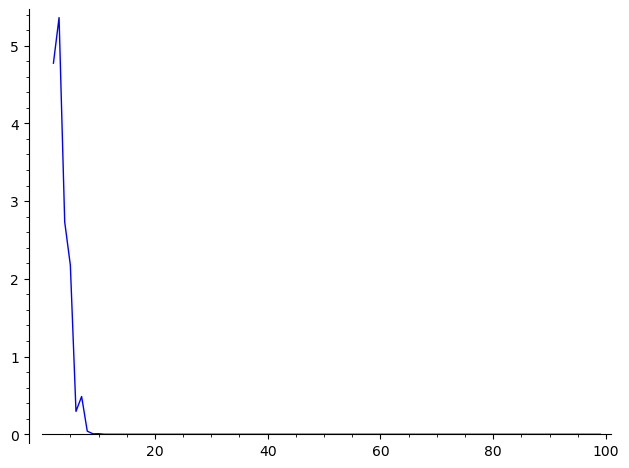

LOGS MINIMUM MODULI


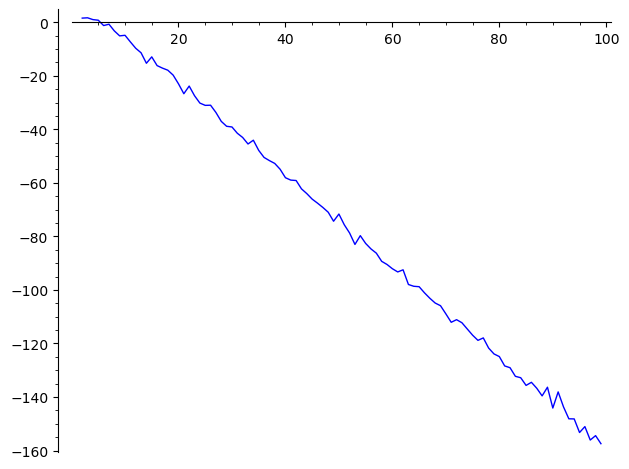

minimum logarithm of minimum modulus: -157.45750321160902571147869489
MAXIMUM MODULI


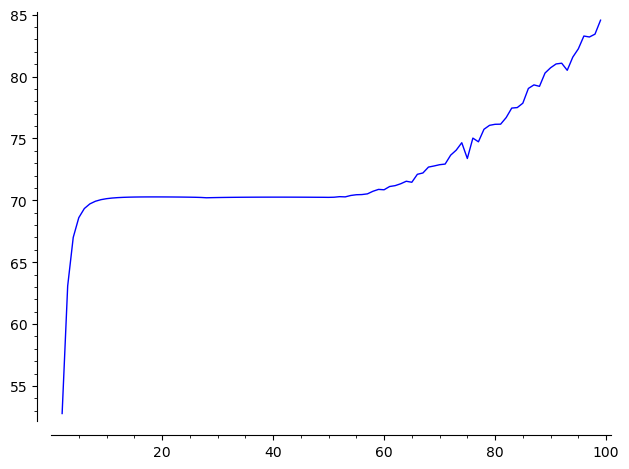

LOGS MAXIMUM MODULI


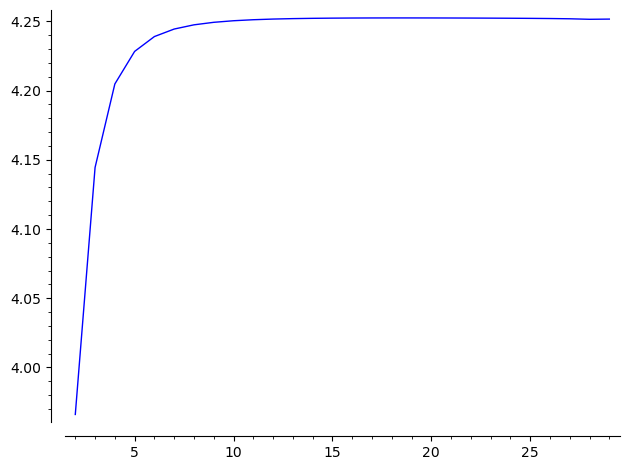


Analysis of lower envelope of logs minimum moduli:


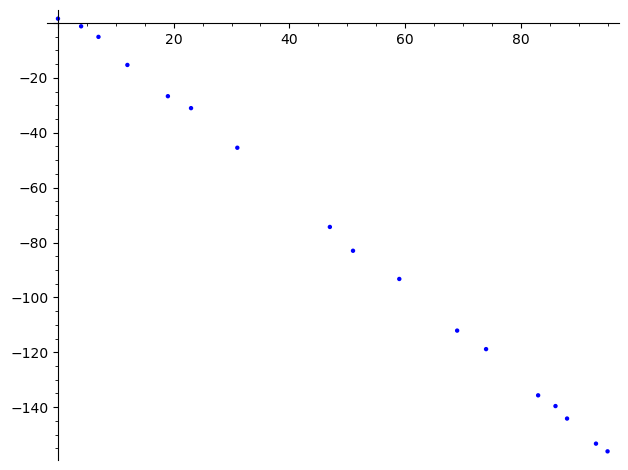

n_list[3:] :
[12, 19, 23, 31, 47, 51, 59, 69, 74, 83, 86, 88, 93, 95]

dt[1:] :
[7, 4, 8, 16, 4, 8, 10, 5, 9, 3, 2, 5, 2]

fives:
[8, 12]

Analysis of upper envelope of logs minimum moduli:


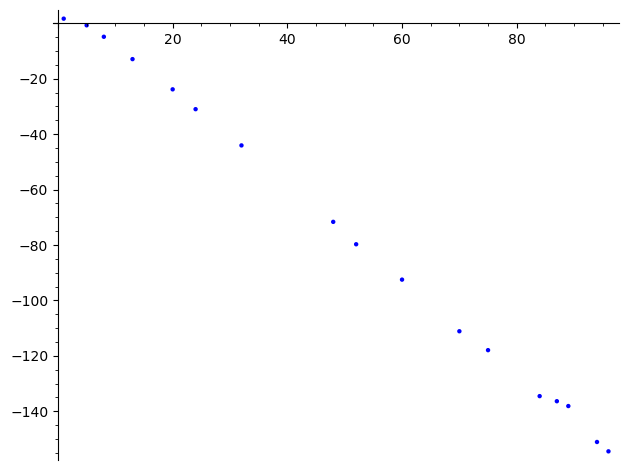

n_list[3:] :
[13, 20, 24, 32, 48, 52, 60, 70, 75, 84, 87, 89, 94, 96]

dt[1:] :
[7, 4, 8, 16, 4, 8, 10, 5, 9, 3, 2, 5, 2]

fives:
[8, 12]



In [7]:
pari.allocatemem(4*10^9) 

import pickle
from sage.all import sigma, nth_prime
import ast

def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope

def upper_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0>val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end>val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding<val_k:
            if val_next<val_k:
                envelope.append((k,val_k))
    return envelope

def difference_table(lst):
    diffs=[]
    for k in range(0,len(lst)):
        diff=lst[k]-lst[k-1]
        diffs=diffs+[diff]
    return diffs
   
def H_matrix(constants):
   
    N = len(constants)
    M = Matrix(QQ, N, N, 0)  

    # Fill subdiagonals and main diagonal
    for i in range(N):
        for row in range(i, N):
            col = row - i
            M[row, col] = constants[i]

    # Fill first superdiagonal with integers starting from 1
    for i in range(0,N-1):
        M[i, i + 1] = 1
    for i in [1..N-1]:
        M[i,0]=(i+1)*constants[i]
    return M

def tau(n):
    def step1(n, k):
        return 35*k**4 - 52*k**3*n + 18*k**2*n**2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tauprime(n): 
    return tau(nth_prime(n))

def j(n):
    return tauprime(n)

j_list=[0]+[j(n) for n in range(1,102)]

h_list=[1]
for n in range(1,101):
    summ=0
    for r in range(1,n+1):
        summ+=j_list[r]*h_list[n-r]
    h_list.append(summ/n)

    



from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
charpol_list=[]
roots_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
dets=[]
tests=[]
for n in range(2,100):
    pl=H_matrix(h_list[1:n+1]) #undeformed
    det=pl.det()
    test=det*(-1)**(n+1)-tauprime(n)
    print((n,test))
    tests.append(test)
    dets.append((n,det))
    matrix_list+=[(n,pl)]
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list+=[(n,roots)]
    aar = [r.abs() for r in roots]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list.append((n,maxx))


print("tests:")
print(tests)
    
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
mml=[pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:",min(mml))
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
p = list_plot(log_maxes_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()

print()
print("Analysis of lower envelope of logs minimum moduli:")

env=lower_envelope_pairlist(log_mins_list)
pls=list_plot(env)
show(pls)
n_list=[pair[0] for pair in env]
dt=difference_table(n_list)
n_list=[pair[0] for pair in env]
print("n_list[3:] :")
print(n_list[3:])
print()
dt=difference_table(n_list[3:])
print("dt[1:] :")
print(dt[1:])
print()
fives=[]
for k in range(0,len(dt)):
    if dt[k]==5:
        fives.append(k)
print("fives:")
print(fives)
print()

print("Analysis of upper envelope of logs minimum moduli:")
env=upper_envelope_pairlist(log_mins_list)
pls=list_plot(env)
show(pls)
n_list=[pair[0] for pair in env]
dt=difference_table(n_list)
n_list=[pair[0] for pair in env]
print("n_list[3:] :")
print(n_list[3:])
print()
dt=difference_table(n_list[3:])
print("dt[1:] :")
print(dt[1:])
print()
fives=[]
for k in range(0,len(dt)):
    if dt[k]==5:
        fives.append(k)
print("fives:")
print(fives)
print()

PARI stack size set to 4000000000 bytes, maximum size set to 4000002048
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
tests:
[]
MINIMUM MODULI


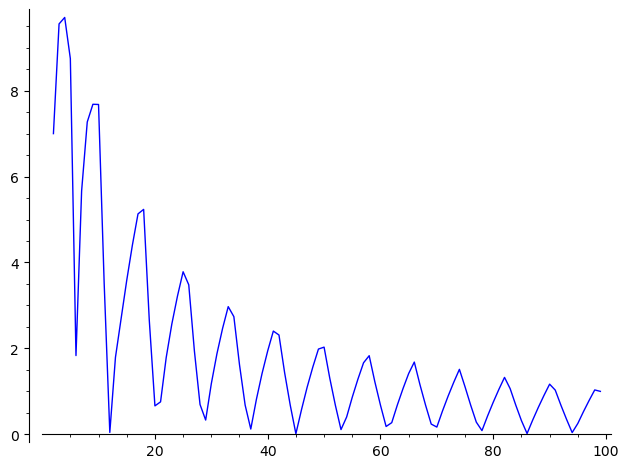

LOGS MINIMUM MODULI


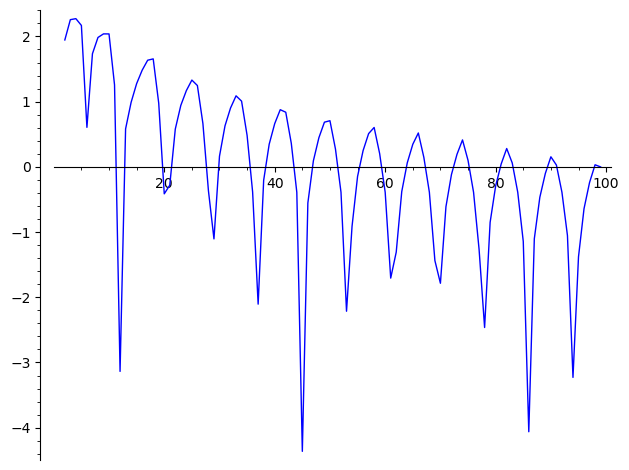

minimum logarithm of minimum modulus: -4.3624962742738547297023314651
MAXIMUM MODULI


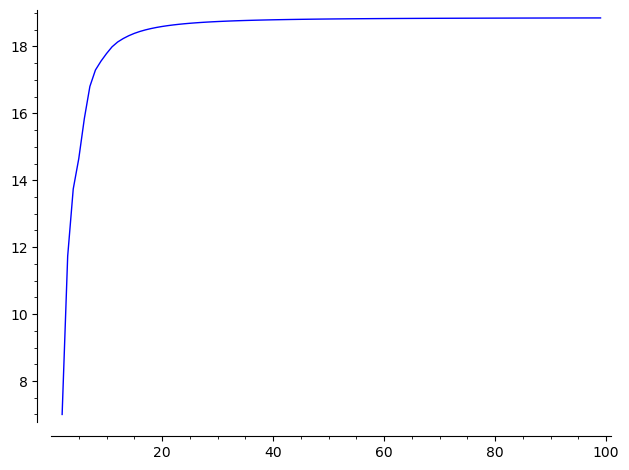

LOGS MAXIMUM MODULI


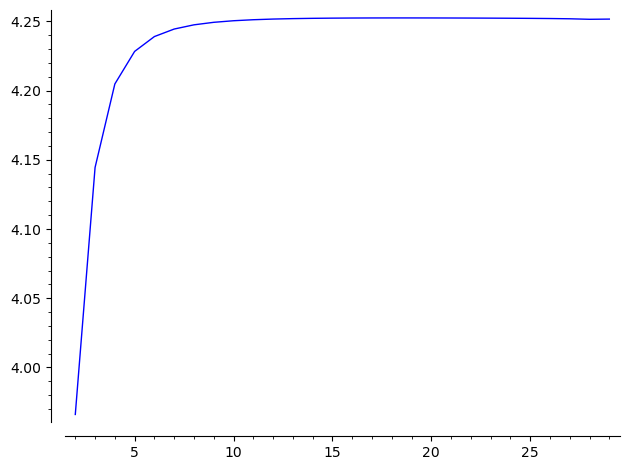


Analysis of lower envelope of logs minimum moduli:


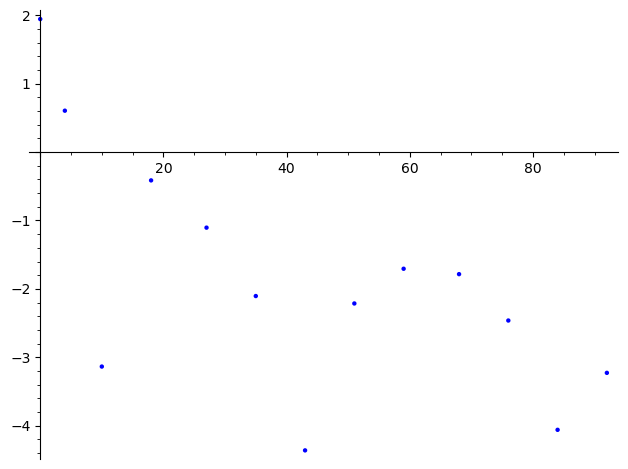

n_list[3:] :
[18, 27, 35, 43, 51, 59, 68, 76, 84, 92]

dt[1:] :
[9, 8, 8, 8, 8, 9, 8, 8, 8]

fives:
[]

Analysis of upper envelope of logs minimum moduli:


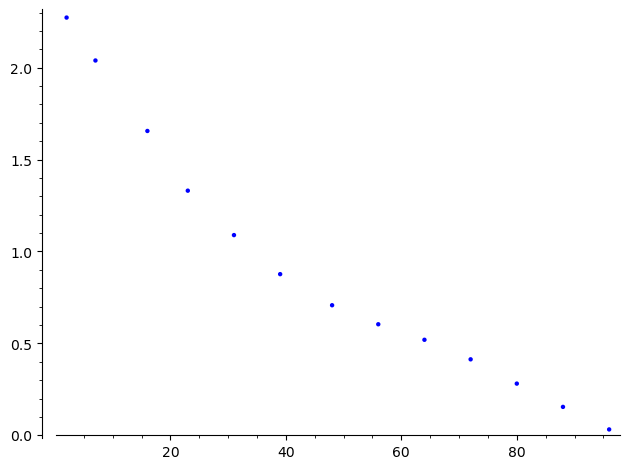

n_list[3:] :
[23, 31, 39, 48, 56, 64, 72, 80, 88, 96]

mod 17:
dt[1:] :
[8, 8, 9, 8, 8, 8, 8, 8, 8]

nines:
[3]



In [15]:
pari.allocatemem(4*10^9) 

import pickle
from sage.all import sigma, nth_prime
import ast

def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope

def upper_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0>val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end>val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding<val_k:
            if val_next<val_k:
                envelope.append((k,val_k))
    return envelope

def difference_table(lst):
    diffs=[]
    for k in range(0,len(lst)):
        diff=lst[k]-lst[k-1]
        diffs=diffs+[diff]
    return diffs
   
def H_matrix(constants):
   
    N = len(constants)
    M = Matrix(QQ, N, N, 0)  

    # Fill subdiagonals and main diagonal
    for i in range(N):
        for row in range(i, N):
            col = row - i
            M[row, col] = constants[i]

    # Fill first superdiagonal with integers starting from 1
    for i in range(0,N-1):
        M[i, i + 1] = 1
    for i in [1..N-1]:
        M[i,0]=(i+1)*constants[i]
    return M

def tau(n):
    def step1(n, k):
        return 35*k**4 - 52*k**3*n + 18*k**2*n**2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tauprime(n): 
    return tau(nth_prime(n))

def j(n):
    return tauprime(n)

j_list=[0]+[j(n) for n in range(1,102)]

h_list=[1]
for n in range(1,101):
    summ=0
    for r in range(1,n+1):
        summ+=j_list[r]*h_list[n-r]
    h_list.append(summ/n)

    



from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
charpol_list=[]
roots_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
dets=[]
tests=[]
for n in range(2,100):
    pl=H_matrix(h_list[:n]) #deformed
    det=pl.det()
    #test=det*(-1)**(n+1)-tauprime(n)
    print((n))
    #tests.append(test)
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list.append((n,cp))
    roots = cp.roots(ring=CC, multiplicities=False) 
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list.append((n,maxx))


print("tests:")
print(tests)
    
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
mml=[pair[1] for pair in log_mins_list]
print("minimum logarithm of minimum modulus:",min(mml))
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
p = list_plot(log_maxes_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()

print()
print("Analysis of lower envelope of logs minimum moduli:")

env=lower_envelope_pairlist(log_mins_list)
pls=list_plot(env)
show(pls)
n_list=[pair[0] for pair in env]
dt=difference_table(n_list)
n_list=[pair[0] for pair in env]
print("n_list[3:] :")
print(n_list[3:])
print()
dt=difference_table(n_list[3:])
print("dt[1:] :")
print(dt[1:])
print()
fives=[]
for k in range(0,len(dt)):
    if dt[k]==5:
        fives.append(k)
print("fives:")
print(fives)
print()

print("Analysis of upper envelope of logs minimum moduli:")
env=upper_envelope_pairlist(log_mins_list)
pls=list_plot(env)
show(pls)
n_list=[pair[0] for pair in env]
dt=difference_table(n_list)
n_list=[pair[0] for pair in env]
print("n_list[3:] :")
print(n_list[3:])
print()
print("mod 17:")
mod17=[n%17 for n in n_list[3:]]
dt=difference_table(n_list[3:])
print("dt[1:] :")
print(dt[1:])
print()
nines=[]
for k in range(0,len(dt)):
    if dt[k]==9:
        nines.append(k)
print("nines:")
print(nines)
print()

In [ ]:
pari.allocatemem(12*10^9) 

import pickle
from sage.all import sigma, nth_prime
import ast

def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope

def upper_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0>val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end>val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding<val_k:
            if val_next<val_k:
                envelope.append((k,val_k))
    return envelope

def difference_table(lst):
    diffs=[]
    for k in range(0,len(lst)):
        diff=lst[k]-lst[k-1]
        diffs=diffs+[diff]
    return diffs
   
def H_matrix(constants):
   
    N = len(constants)
    M = Matrix(QQ, N, N, 0)  

    # Fill subdiagonals and main diagonal
    for i in range(N):
        for row in range(i, N):
            col = row - i
            M[row, col] = constants[i]

    # Fill first superdiagonal with integers starting from 1
    for i in range(0,N-1):
        M[i, i + 1] = 1
    for i in [1..N-1]:
        M[i,0]=(i+1)*constants[i]
    return M

def tau(n):
    def step1(n, k):
        return 35*k**4 - 52*k**3*n + 18*k**2*n**2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tauprime(n): 
    return tau(nth_prime(n))

def j(n):
    return tauprime(n)

j_list=[0]+[j(n) for n in range(1,505)]

h_list=[1]
for n in range(1,504):
    summ=0
    for r in range(1,n+1):
        summ+=j_list[r]*h_list[n-r]
    h_list.append(summ/n)

    



from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
charpol_list=[]
roots_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
dets=[]
tests=[]
for n in range(2,501):# interrupted after n = 400
    pl=H_matrix(h_list[:n]) #deformed
    det=pl.det()
    #test=det*(-1)**(n+1)-tauprime(n)
    print((n))
    #tests.append(test)
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list.append((n,cp))
    roots = cp.roots(ring=CC, multiplicities=False) 
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list.append((n,maxx))

with open('/Users/barrybrent/data/run4dec25no1.txt', 'wb') as wfile:
    pickle.dump(h_list, wfile) #output snipped
with open('/Users/barrybrent/data/run4dec25no2.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped
with open('/Users/barrybrent/data/run4dec25no3.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped
with open('/Users/barrybrent/data/run4dec25no4.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) #output snipped
with open('/Users/barrybrent/data/run4dec25no5.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped
with open('/Users/barrybrent/data/run4dec25no6.txt', 'wb') as wfile:
    pickle.dump(maxes_list, wfile) #output snipped
with open('/Users/barrybrent/data/run4dec25no7.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped


In [19]:
import pickle
rfile = open('/Users/barrybrent/data/run4dec25no4.txt','rb') 
mins_list=pickle.load(rfile)
rfile.close()
print("length of mins_list:",len(mins_list))
print()
def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope

def upper_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0>val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end>val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding<val_k:
            if val_next<val_k:
                envelope.append((k,val_k))
    return envelope

def difference_table(lst):
    diffs=[]
    for k in range(0,len(lst)):
        diff=lst[k]-lst[k-1]
        diffs=diffs+[diff]
    return diffs

   
import pickle

env=lower_envelope_pairlist(mins_list)
print("length of lower envelope:",len(env))
print()
n_list=[pair[0] for pair in env]
print("envelope abscissas:")
print(n_list)
print()
nl4=[n%4 for n in n_list]
print("abscissas modulo 4:")
print(nl4)

length of mins_list: 398

length of lower envelope: 50

envelope abscissas:
[0, 4, 10, 18, 27, 35, 43, 51, 59, 68, 76, 84, 92, 100, 109, 117, 125, 133, 141, 149, 158, 166, 174, 182, 190, 199, 207, 215, 223, 231, 239, 248, 256, 264, 272, 280, 289, 297, 305, 313, 321, 330, 338, 346, 354, 362, 370, 379, 387, 395]

abscissas modulo 4:
[0, 0, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3]


In [20]:
import pickle
rfile = open('/Users/barrybrent/data/run4dec25no5.txt','rb') 
log_mins_list=pickle.load(rfile)
rfile.close()
print("length of log_mins_list:",len(log_mins_list))
print()
def lower_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0<val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end<val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding>val_k:
            if val_next>val_k:
                envelope.append((k,val_k))
    return envelope

def upper_envelope_pairlist(pair_list):
    envelope=[]
    for k in range(0,len(pair_list)-1):
        if k==0:
            val0=pair_list[k][1]
            val1=pair_list[k+1][1]
            if val0>val1:
                envelope.append((k,val0))
        if k==len(pair_list)-1:
            val_end=pair_list[k][1]
            val_preceding=pair_list[k-1][1]
            if val_end>val_preceding:
                envelope.append((k,val_end))
        val_preceding=pair_list[k-1][1]
        val_k=pair_list[k][1]
        val_next=pair_list[k+1][1]
        if val_preceding<val_k:
            if val_next<val_k:
                envelope.append((k,val_k))
    return envelope

def difference_table(lst):
    diffs=[]
    for k in range(0,len(lst)):
        diff=lst[k]-lst[k-1]
        diffs=diffs+[diff]
    return diffs

   
import pickle

env=lower_envelope_pairlist(log_mins_list)
print("length of lower envelope:",len(env))
print()
n_list=[pair[0] for pair in env]
print("envelope abscissas:")
print(n_list)
print()
nl4=[n%4 for n in n_list]
print("abscissas modulo 4:")
print(nl4)

length of log_mins_list: 398

length of lower envelope: 50

envelope abscissas:
[0, 4, 10, 18, 27, 35, 43, 51, 59, 68, 76, 84, 92, 100, 109, 117, 125, 133, 141, 149, 158, 166, 174, 182, 190, 199, 207, 215, 223, 231, 239, 248, 256, 264, 272, 280, 289, 297, 305, 313, 321, 330, 338, 346, 354, 362, 370, 379, 387, 395]

abscissas modulo 4:
[0, 0, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3]


MINIMUM MODULI


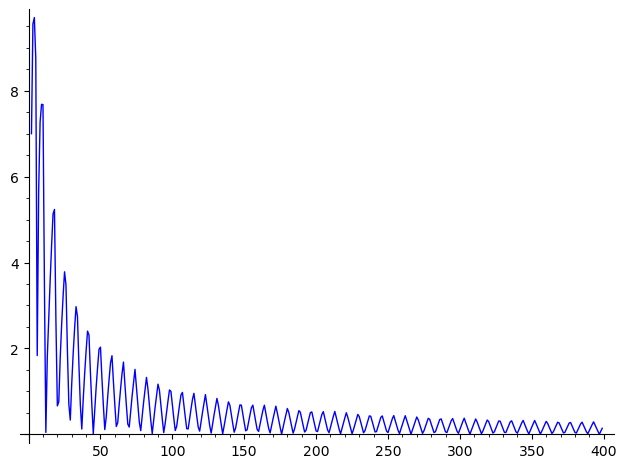

LOGS MINIMUM MODULI


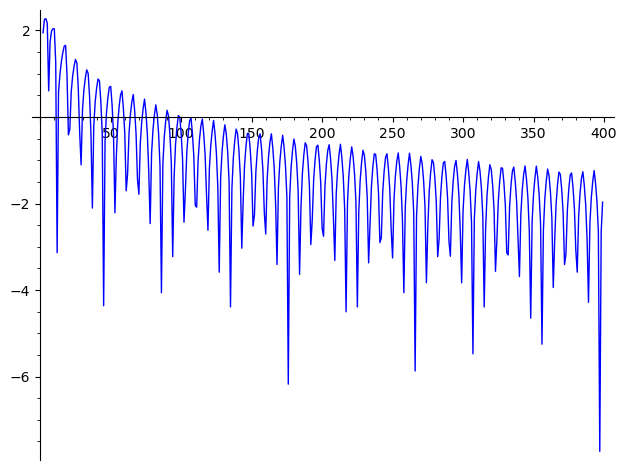

In [21]:
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()